# 1->

I->Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

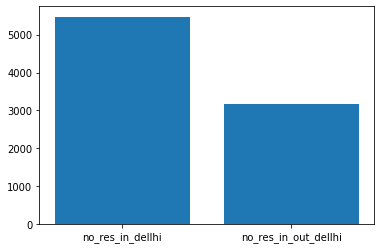

In [119]:
import pandas as pd
df = pd.read_csv('zomato.csv',encoding = 'latin1')
df = df[df['Country Code'] == 1]
df1 = df[df['City'] == 'New Delhi']
df2 = df[df['City'] != 'New Delhi']
no_res_in_dellhi = df1.shape[0]
no_res_in_out_dellhi = df2.shape[0]
x = ['no_res_in_dellhi','no_res_in_out_dellhi']
y = [no_res_in_dellhi,no_res_in_out_dellhi]
plt.bar(x,y)
plt.show()

II-> Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [122]:
#Cuisines present in dellhi
dellhi_Cuisines = {}
for i in df1['Cuisines']:
    str = i.split(',')
    for j in str:
        dellhi_Cuisines[j] = dellhi_Cuisines.get(j,0) + 1
cus1 = dellhi_Cuisines.keys()
cus1 = set(cus1)
print(cus1)

{'Bihari', ' Japanese', ' Salad', ' French', 'Mexican', 'Middle Eastern', 'Drinks Only', ' Afghani', 'Fast Food', ' Ice Cream', 'Beverages', 'Japanese', ' Maharashtrian', ' Mughlai', 'Bakery', 'Asian', 'South American', 'Finger Food', 'Chinese', 'Seafood', 'Continental', 'Cafe', ' Malaysian', 'South Indian', ' Pizza', ' Middle Eastern', 'Vietnamese', 'Mughlai', ' Turkish', ' North Indian', ' Chinese', 'Modern Indian', ' Goan', 'Pizza', 'Maharashtrian', ' Andhra', ' Deli', ' Mithai', ' Mangalorean', ' Parsi', ' Beverages', 'Kashmiri', 'Rajasthani', ' Hyderabadi', ' Fast Food', 'Lucknowi', ' Continental', 'Kerala', ' Sushi', 'Assamese', 'Awadhi', 'Burger', ' Street Food', 'Lebanese', 'Turkish', ' Mexican', ' Mediterranean', 'Juices', ' Gujarati', 'Naga', ' Modern Indian', ' Indian', 'Tea', ' African', ' Juices', 'Nepalese', 'Parsi', 'Street Food', ' Italian', ' Cafe', ' Kashmiri', ' Bengali', 'Hyderabadi', 'Goan', 'Spanish', ' Pakistani', 'North Indian', 'Portuguese', ' Thai', 'Bengali',

In [123]:
#Cuisines present in outside dellhi
out_dellhi_Cuisines = {}
for i in df2['Cuisines']:
    str = i.split(',')
    for j in str:
        out_dellhi_Cuisines[j] = out_dellhi_Cuisines.get(j,0) + 1
cus2 = out_dellhi_Cuisines.keys()
cus2 = set(cus2)
print(cus2)

{'Bihari', ' Japanese', 'Malwani', ' Salad', 'Mexican', ' French', 'Drinks Only', 'Fast Food', ' Ice Cream', 'Beverages', 'Japanese', ' Maharashtrian', ' Mughlai', 'Bakery', 'Asian', 'South American', 'Finger Food', 'Chinese', 'Seafood', 'Continental', 'Cafe', ' Malaysian', 'South Indian', ' Pizza', ' Middle Eastern', 'Mughlai', ' North Indian', ' Chinese', 'Modern Indian', ' Goan', ' Cajun', 'Pizza', 'Maharashtrian', ' Andhra', ' Mithai', ' Mangalorean', ' Parsi', ' Beverages', 'Rajasthani', 'Kashmiri', ' Hyderabadi', ' Fast Food', 'Lucknowi', ' Continental', 'Kerala', ' Sushi', 'Awadhi', 'Burger', ' Street Food', 'Lebanese', ' Portuguese', ' Mexican', ' Mediterranean', 'Juices', 'Greek', ' Gujarati', ' Modern Indian', ' Indian', 'Tea', ' African', ' Juices', 'Steak', 'Parsi', 'Street Food', ' Italian', ' Cafe', ' Kashmiri', ' Bengali', 'Hyderabadi', 'Goan', ' Pakistani', 'North Indian', 'Portuguese', ' Thai', 'Bengali', 'Raw Meats', 'Afghani', ' Lebanese', ' Nepalese', ' American', '

In [124]:
##Cuisines present in ouside dellhi but in dellhi accoring to csv
print(cus2-cus1)

{' German', 'Tex-Mex', ' Assamese', ' Greek', ' BBQ', 'Andhra', ' Portuguese', 'Steak', 'Malwani', ' Steak', ' Charcoal Grill', ' Belgian', 'Indian', 'Charcoal Grill', ' Cajun', 'Persian', 'Greek'}


In [128]:
#list of Cuisines which are present in dellhi but not in csv(data by API call)
import requests
data = {"Accept": "application/json",'user-key':'4cadd54bed888f1b6934a4eb673b6fb2'}
res = requests.get('https://developers.zomato.com/api/v2.1/cuisines',headers = data,params = {'city_id': 1})
res = res.json()
arr = []
b= []
for i in res['cuisines']:
    arr.append(i['cuisine']['cuisine_name'])
for i in arr:
    if (i in cus1):
        pass
    else:
        b.append(i)
print(b)

['Afghan', 'African', 'Andhra', 'Armenian', 'BBQ', 'Bar Food', 'Belgian', 'Brazilian', 'Bubble Tea', 'Cantonese', 'Charcoal Chicken', 'Chettinad', 'Coffee', 'Egyptian', 'Ethiopian', 'Frozen Yogurt', 'Garhwali', 'Greek', 'Grocery', 'Himachali', 'Hot dogs', 'Indonesian', 'Iranian', 'Israeli', 'Jamaican', 'Kebab', 'Malwani', 'Mangalorean', 'Mishti', 'Momos', 'Moroccan', 'Odia', 'Paan', 'Pakistani', 'Panini', 'Pasta', 'Poké', 'Relief fund', 'Roast Chicken', 'Rolls', 'Russian', 'Sandwich', 'Sindhi', 'Singaporean', 'Sri Lankan', 'Steak', 'Tamil', 'Tex-Mex', 'Wraps']


III->Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

North Indian 1848
 Chinese 1069
 Fast Food 858
 North Indian 577
Chinese 569
 Mughlai 467
Fast Food 446
Bakery 397
Cafe 298
 Desserts 291
 Italian 288


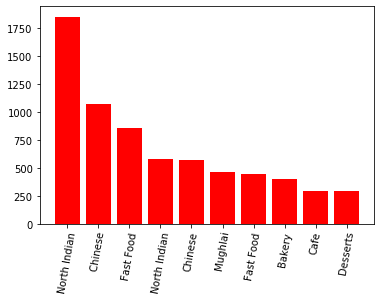

In [146]:
#In Delhi NCR
import matplotlib.pyplot as plt
dellhi_Cuisines = {}
for i in df1['Cuisines']:
    str = i.split(',')
    for j in str:
        dellhi_Cuisines[j] = dellhi_Cuisines.get(j,0) + 1
res = {key: val for key, val in sorted(dellhi_Cuisines.items(), key = lambda ele: ele[1], reverse = True)}
x= []
y=[]
j =0
for i in res:
    print(i,res[i])
    if(j==10):
        break
    x.append(i)
    y.append(res[i])
    j=j + 1
plt.bar(x,y,color = 'red')
plt.xticks(rotation = 80)
plt.show()


    

North Indian 1142
 Chinese 792
 Fast Food 447
 North Indian 379
 Mughlai 310
Cafe 263
Chinese 260
 Continental 234
Bakery 219
 Italian 217
Fast Food 212


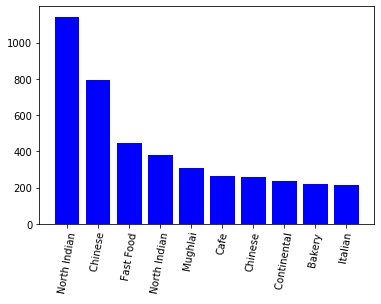

In [144]:
#Rest of India
out_dellhi_Cuisines = {}
for i in df2['Cuisines']:
    str = i.split(',')
    for j in str:
        out_dellhi_Cuisines[j] = out_dellhi_Cuisines.get(j,0) + 1
res = {key: val for key, val in sorted(out_dellhi_Cuisines.items(), key = lambda ele: ele[1], reverse = True)}
x1= []
y1=[]
j =0
for i in res:
    print(i,res[i])
    if(j==10):
        break
    x1.append(i)
    y1.append(res[i])
    j=j + 1
plt.bar(x1,y1,color='blue')
plt.xticks(rotation = 80)
plt.show()


IV->Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

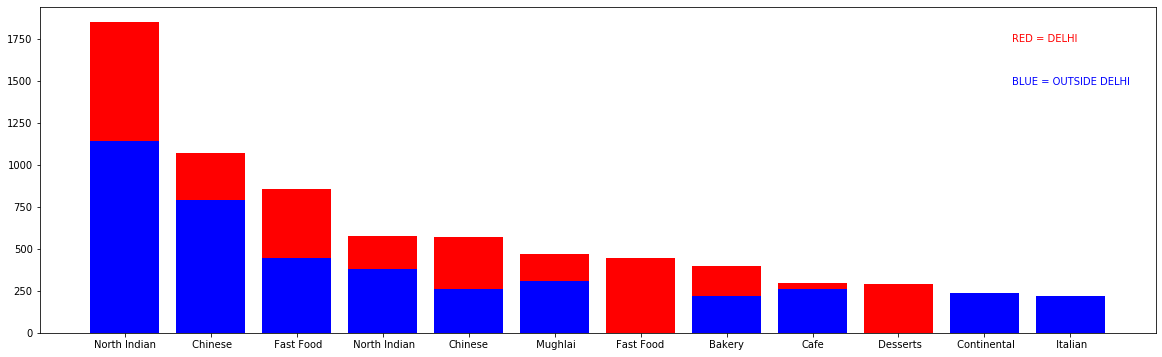

In [164]:
plt.figure(figsize=(20,6))
plt.bar(x,y,color = 'red')
plt.bar(x1,y1,color = 'blue')
plt.figtext(.8, .8, "RED = DELHI",color = 'red')
plt.figtext(.8, .7,'BLUE = OUTSIDE DELHI',color = 'blue')
plt.show()

# 2--->

Write a short detail analysis of how the rating is affected by restaurant due following features: 
    Plot a suitable graph to explain your inference.



    I->Number of Votes given Restaurant

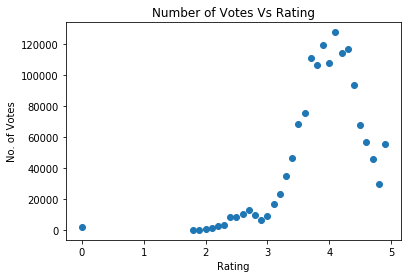

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('zomato.csv',encoding = 'latin1')
dict = {}
for i,j in zip(df['Aggregate rating'],df['Votes']):
    dict[i] = dict.get(i,0) + j
plt.scatter(dict.keys(),dict.values())
plt.xlabel('Rating')
plt.title('Number of Votes Vs Rating')
plt.ylabel('No. of Votes')
plt.show()

II->Restaurant serving more number of cuisines.

average rating of resturant having 1 Cuisine ->2.2306717737183255
average rating of resturant having 2 Cuisine ->2.693292682926834
average rating of resturant having 3 Cuisine ->3.0392391304347837
average rating of resturant having 4 Cuisine ->3.4155821917808207
average rating of resturant having 5 Cuisine ->3.5103658536585356
average rating of resturant having 6 Cuisine ->3.672972972972973
average rating of resturant having 7 Cuisine ->3.6714285714285713
average rating of resturant having 8 Cuisine ->3.4214285714285717


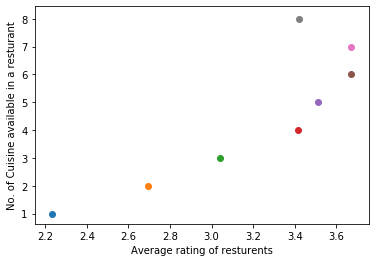

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('zomato.csv',encoding = 'latin1')
def isnan(value):
    try:
        import math
        return math.isnan(float(value))
    except:
        return False

dict = {}
cus= [0,0,0,0,0,0,0,0,0]
for i,j in zip(df['Aggregate rating'],df['Cuisines']):
    if (isnan(j)):
        pass
    else:
        str = j.split(',')
        str = len(str)
        cus[str] += i
        dict[str] = dict.get(str,0) + 1
for i in range(1,9):
    plt.scatter(cus[i]/dict[i],i)
    plt.plot(cus[i]/dict[i],i)
    print('average rating of resturant having',i,'Cuisine ->',end='')
    print(cus[i]/dict[i])
plt.xlabel("Average rating of resturents")
plt.ylabel("No. of Cuisine available in a resturant")
plt.show()
        
        
        
        
    

III->Average Cost of Restaurant

Due to price fluctuation between countries. we consider only one country at a time for better clearity

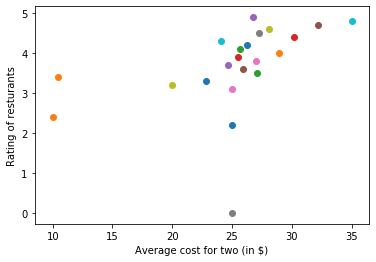

In [80]:
# data for usa
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('zomato.csv',encoding = 'latin1')
df = df[df['Country Code']==216]
dict = {}
dict1 = {}
for i,j in zip(df['Aggregate rating'],df['Average Cost for two']):
    if (isnan(j)):
        pass
    else:
        dict[i] = dict.get(i,0) + j
        dict1[i] = dict1.get(i,0) + 1
for i in dict:
    plt.scatter(dict[i]/dict1[i],i)
plt.xlabel("Average cost for two (in $)")
plt.ylabel("Rating of resturants")
plt.show()

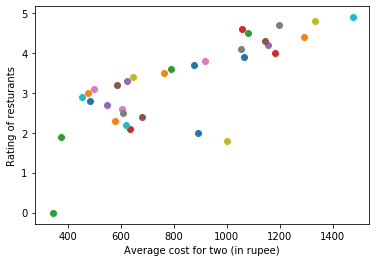

In [166]:
# data for india
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('zomato.csv',encoding = 'latin1')
df = df[df['Country Code']==1]
dict = {}
dict1 = {}
for i,j in zip(df['Aggregate rating'],df['Average Cost for two']):
    if (isnan(j)):
        pass
    else:
        dict[i] = dict.get(i,0) + j
        dict1[i] = dict1.get(i,0) + 1
for i in dict:
    plt.scatter(dict[i]/dict1[i],i)
plt.xlabel("Average cost for two (in rupee)")
plt.ylabel("Rating of resturants")
plt.show()

IV->Restaurant serving some specific cuisines.

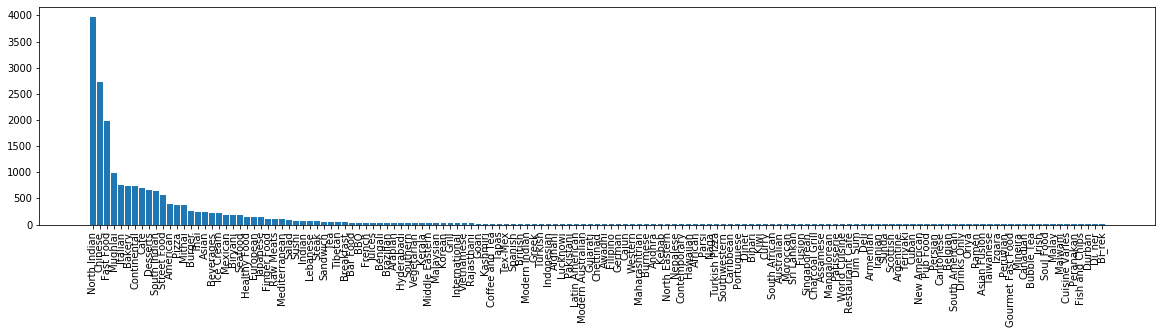

North Indian 3960
Chinese 2735
Fast Food 1986
Mughlai 995
Italian 764
Bakery 745
Continental 736
Cafe 703
Desserts 653
South Indian 636
Street Food 562
American 390
Pizza 381
Mithai 380
Burger 251
Thai 234
Asian 233
Beverages 229
Ice Cream 226
Mexican 181
Biryani 177
Seafood 174
Healthy Food 150
European 148
Japanese 135
Finger Food 114
Raw Meats 114
Mediterranean 112
Salad 93
Sushi 75
Indian 70
Lebanese 69
Steak 62
Sandwich 53
Tea 48
Tibetan 44
Breakfast 41
Bar Food 39
BBQ 33
French 29
Juices 29
Bengali 29
Brazilian 28
Arabian 28
Hyderabadi 26
Southern 24
Vegetarian 23
Kerala 23
Middle Eastern 22
Malaysian 22
Korean 21
Grill 21
International 21
Vietnamese 21
Rajasthani 21
Goan 20
Kashmiri 20
Coffee and Tea 19
Tapas 19
Tex-Mex 19
Spanish 16
British 16
Modern Indian 16
Greek 15
Turkish 15
Indonesian 14
Afghani 14
Lucknowi 13
Pakistani 12
Latin American 11
Modern Australian 11
Gujarati 11
Chettinad 11
Awadhi 11
Filipino 10
German 10
Cajun 10
Western 10
Maharashtrian 10
Burmese 10
Andhra 

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('zomato.csv',encoding = 'latin1')
dict={}
def isnan(value):
    try:
        import math
        return math.isnan(float(value))
    except:
        return False
for i in df['Cuisines']:
    if (isnan(i)):
        pass
    else:
        i = i.split(',')
        for j in i:
            j= j.strip()
            dict[j] = dict.get(j,0)+ 1
res = {key: val for key, val in sorted(dict.items(), key = lambda ele: ele[1], reverse = True)} 
plt.figure(figsize=(20,4))
plt.bar(res.keys(),res.values())
plt.xticks(rotation=90)
plt.show() 
for i in res:
    print(i,res[i])
    

2-2>I->
Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
    
    

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('zomato.csv',encoding = 'latin1')
dict={}
dict1 = {}
def isnan(value):
    try:
        import math
        return math.isnan(float(value))
    except:
        return False
for i,j,k in zip(df['Locality'],df['Aggregate rating'],df['Votes']):
    if (isnan(i)):
        pass
    else:
        if(k==0):
            continue
        x = j*k
        dict[i] = dict.get(i,0) + x
        dict1[i] = dict.get(i,0) + k
for i in dict:
    dict[i] = dict[i]/dict1[i]
res = {key: val for key, val in sorted(dict.items(), key = lambda ele: ele[1], reverse = True)}
j = 0 
for i in res:
    if(j==10):
        break
    print(i,'--->',res[i])
    j= j+1


Sector 15 ---> 0.9999208604056695
DLF Phase 1 ---> 0.9999012901378976
Sector 31 ---> 0.9998833234158236
Sector 35 ---> 0.999879745541566
Pacific Mall, Tagore Garden ---> 0.9998699491501177
Yusuf Sarai ---> 0.999674563915647
Sector 29 ---> 0.9996328310620184
Lajpat Nagar 2 ---> 0.9996239894717052
Sector 8 ---> 0.9996205653576171
Jaipuria Plaza, Sector 26, Noida ---> 0.9996018157203154


# 3 - Visualization

I->Plot the bar graph top 15 restaurants have a maximum number of outlets.

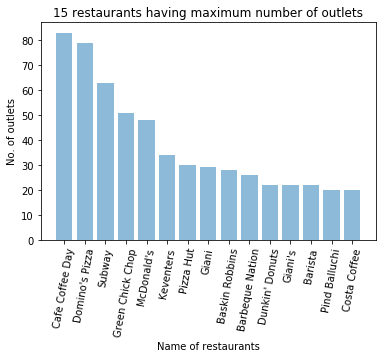

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('zomato.csv',encoding = 'latin1')
dict = {}
for i in df['Restaurant Name']:
    dict[i] = dict.get(i,0) + 1
res = {key: val for key, val in sorted(dict.items(), key = lambda ele: ele[1], reverse = True)} 
j = 0
x = []
y =[]
for i in res:
    if (j==15):
        break
    x.append(i)
    y.append(res[i])
    j = j+1
    
plt.bar(x, y, align='center', alpha=0.5)
plt.ylabel("No. of outlets")
plt.xlabel("Name of restaurants")
plt.xticks(rotation = 80)
plt.title('15 restaurants having maximum number of outlets')
plt.show()

II->Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant)

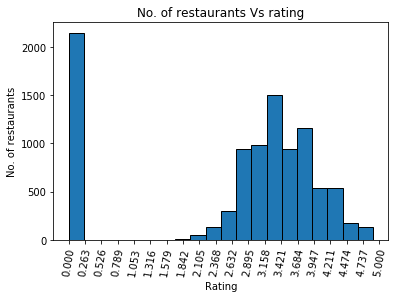

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('zomato.csv',encoding = 'latin1')
a = df['Aggregate rating']
plt.hist(a,edgecolor='black',bins = 20)
b = np.linspace(0,5,20)
plt.xticks(b)
plt.xticks(rotation = 80)
plt.ylabel("No. of restaurants")
plt.xlabel("Rating")
plt.title('No. of restaurants Vs rating')
plt.show()

III->Plot the bar graph top 10 restaurants in the data with the highest number of votes.

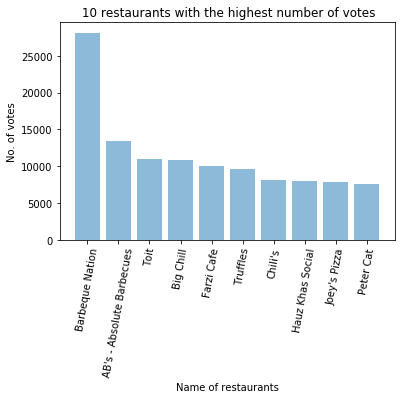

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('zomato.csv',encoding = 'latin1')
dict = {}
for i,j in zip(df['Restaurant Name'],df['Votes']):
    dict[i] = dict.get(i,0) + j
res = {key: val for key, val in sorted(dict.items(), key = lambda ele: ele[1], reverse = True)}
j = 0
x = []
y =[]
for i in res:
    if (j==10):
        break
    x.append(i)
    y.append(res[i])
    j = j+1
    
plt.bar(x, y, align='center', alpha=0.5)
plt.xticks(rotation = 80)
plt.ylabel("No. of votes")
plt.xlabel("Name of restaurants")
plt.title(' 10 restaurants with the highest number of votes')
plt.show()
    


IV->Plot the pie graph of top 10 cuisines present in restaurants in the USA.

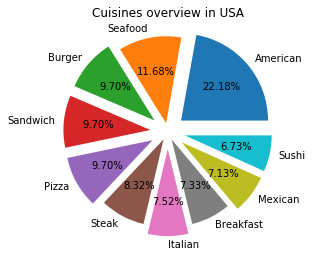

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('zomato.csv',encoding = 'latin1')
df= df[df['Country Code']==216]
dict={}
def isnan(value):
    try:
        import math
        return math.isnan(float(value))
    except:
        return False
for i in df['Cuisines']:
    if (isnan(i)):
        pass
    else:
        i = i.split(',')
        for j in i:
            j= j.strip()
            dict[j] = dict.get(j,0)+ 1
res = {key: val for key, val in sorted(dict.items(), key = lambda ele: ele[1], reverse = True)} 
j = 0
x = []
y =[]
for i in res:
    if (j==10):
        break
    x.append(i)
    y.append(res[i])
    j = j+1
exp= [.2,0.1,.2,.2,.2,.1,.2,.1,.2,.2]
plt.pie(size,labels=x,autopct="%.2f%%",explode=exp)
plt.title("Cuisines overview in USA")
plt.show()

V->Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

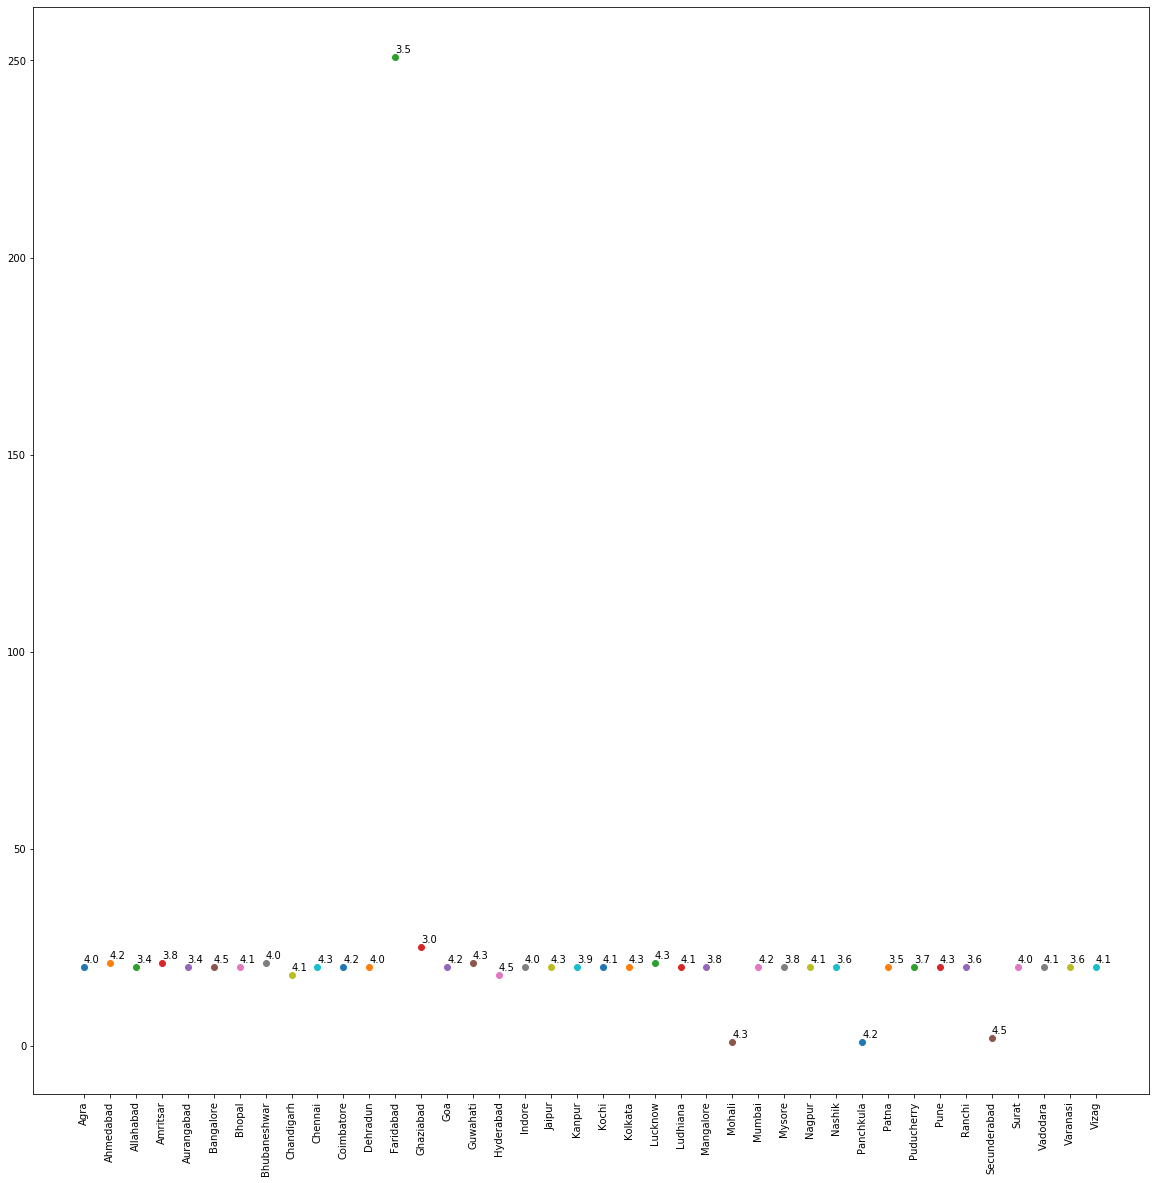

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('zomato.csv',encoding = 'latin1')
df= df[df['Country Code']==1]
dict={}
dict1 = {}
dict2 = {}
def isnan(value):
    try:
        import math
        return math.isnan(float(value))
    except:
        return False
for i,j,k in zip(df['City'],df['Aggregate rating'],df['Votes']):
    if (isnan(i)):
        pass
    else:
        i= i.strip()
        dict[i] = dict.get(i,0)+ 1
        if (k==0):
            continue
        x = (j*k)
        dict1[i] = dict1.get(i,0) + x
        dict2[i] = dict2.get(i,0) + k
plt.figure(figsize=(20,20))
for i in dict:
    if (i=='New Delhi' or i=='Noida' or i=='Gurgaon'):
        continue
    plt.scatter(i,dict[i])
    cv = round(dict1[i]/dict2[i], 1)
    plt.text(i,dict[i]+1,cv)
plt.xticks(rotation=90)
plt.show()
